In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle

In [2]:
df_purchase=pd.read_csv("purchase data.csv")

In [3]:
df_purchase

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,1,0,0,0,0,42,1,120946,1,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,0,42,1,120946,1,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,0,42,1,120946,1,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,0,42,1,120946,1,0


In [4]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

In [5]:
scaler=pickle.load(open('../Segmentation/scaler.pickle','rb'))
pca=pickle.load(open('../Segmentation/pca.pickle','rb'))
kmeans_pca=pickle.load(open('../Segmentation/kmeans_pca.pickle','rb'))

In [6]:
features=df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation','Settlement size']]

In [7]:
std=scaler.transform(features)

In [8]:
df_purchase_pca=pca.transform(std)

In [9]:
df_purchase_kmeans_pca=kmeans_pca.predict(df_purchase_pca)

In [10]:
df_purchase_predictor = df_purchase.copy()

In [11]:
df_purchase_predictor['Segment']=df_purchase_kmeans_pca

In [12]:
df_purchase_predictor['Segment'].value_counts()

0    21495
2    13580
1    12123
3    11495
Name: Segment, dtype: int64

In [20]:
temp1=df_purchase_predictor[['Incidence','ID']].groupby(['ID']).count()

In [24]:
temp1.columns=['#visits']
temp1.head()

,#visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [27]:
temp2=df_purchase_predictor[['Incidence','ID']].groupby(['ID']).sum()
temp3=temp1.join(temp2)

In [28]:
temp3.head()

,#visits,Incidence
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [31]:
temp3['Avg_N_purchase']=temp3['Incidence']/temp3['#visits']

In [35]:
temp3.head()

,#visits,Incidence,Avg_N_purchase
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [36]:
temp4=df_purchase_predictor[['ID','Segment']].groupby(['ID']).mean()

In [40]:
df_purchase_desc=temp3.join(temp4)

In [41]:
df_purchase_desc.head()

,#visits,Incidence,Avg_N_purchase,Segment
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,3
200000003,97,10,0.103093,0
200000004,85,11,0.129412,0
200000005,111,13,0.117117,2


In [48]:
#Segment Prop
seg_prop=df_purchase_desc[['Segment','Incidence']].groupby(['Segment']).count()/len(df_purchase_desc)

In [49]:
seg_prop

,Incidence
Segment,
0,0.378
1,0.206
2,0.220
3,0.196


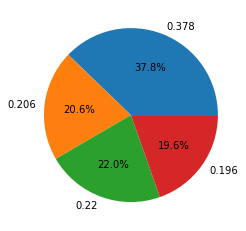

In [63]:
plt.pie(seg_prop['Incidence'],labels=seg_prop['Incidence'],autopct="%1.1f%%");